# Calendar method

---
Use last cycle's ovulation date as guess for this one.

In [5]:
%pylab --no-import-all inline

from os import path
import sys
import pandas as pd
import seaborn as sns

# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# add the 'src' directory as one where we can import modules
src_dir = path.join("..", 'src')
sys.path.append(src_dir)

# import my method from the source code
%aimport features.build_features
%aimport visualization.visualize
from features.build_features import previous_value
from visualization.visualize import modified_bland_altman_plot

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
file = path.join("..", "data", "processed", "df.csv")
df = pd.read_csv(file, index_col=0)

In [7]:
calendar_guess = previous_value('L_PREOVULATION', df)

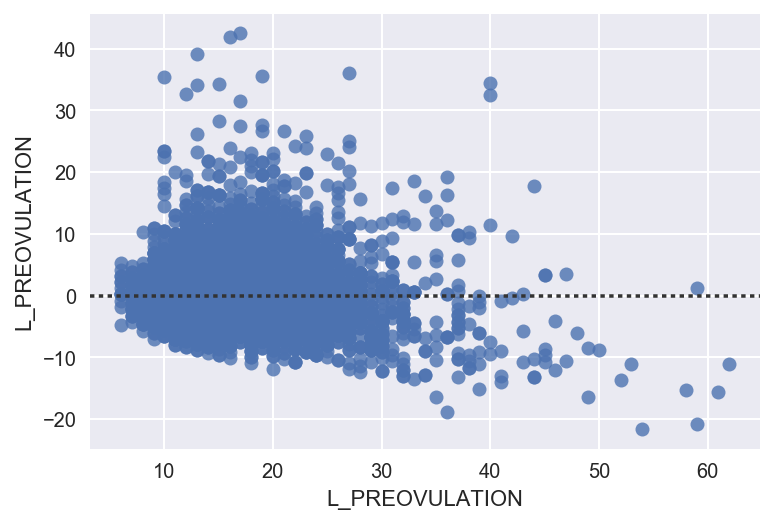

In [8]:
sns.residplot(x=df.L_PREOVULATION, y=calendar_guess, order=0);

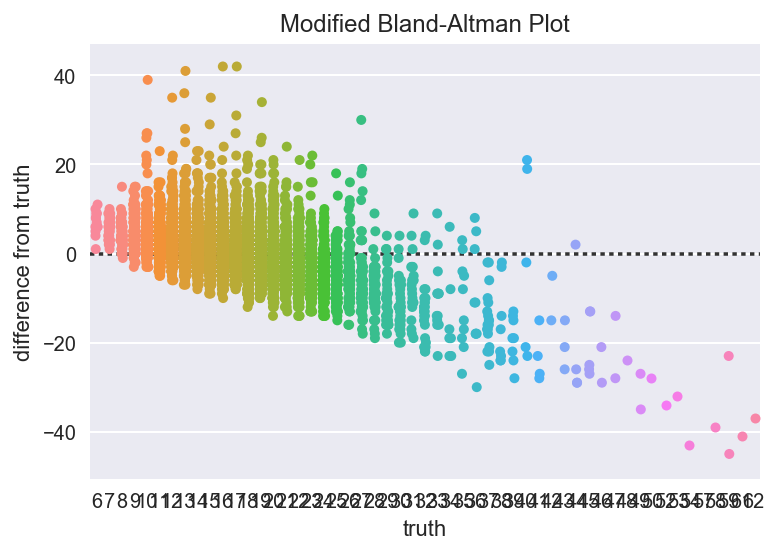

In [9]:
modified_bland_altman_plot(calendar_guess, df.L_PREOVULATION);

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
data = df
data['GUESS'] = calendar_guess
data.dropna(subset=['GUESS'], inplace=True)
mean_squared_error(data.L_PREOVULATION, data.GUESS)

17.961194731890874